In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
hitter_data = pd.read_csv("hitters.csv")
hitter_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
hitter_data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [4]:
hitter_data.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [5]:
hitter_data.Salary

0         NaN
1       475.0
2       480.0
3       500.0
4        91.5
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 322, dtype: float64

In [6]:
hitter_data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
mean = np.mean(hitter_data['Salary'])
mean

535.9258821292775

In [8]:
hitter_data['Salary'] = hitter_data.fillna(mean)
hitter_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,293,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,479,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,496,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,321,N


In [9]:
hitter_data.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [10]:
hitter_data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000


In [11]:
hitter_data.Salary.describe()

count     322
unique    247
top       315
freq        4
Name: Salary, dtype: int64

# Correlation

In [12]:
correlation = hitter_data.corr()
correlation

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115


<AxesSubplot:>

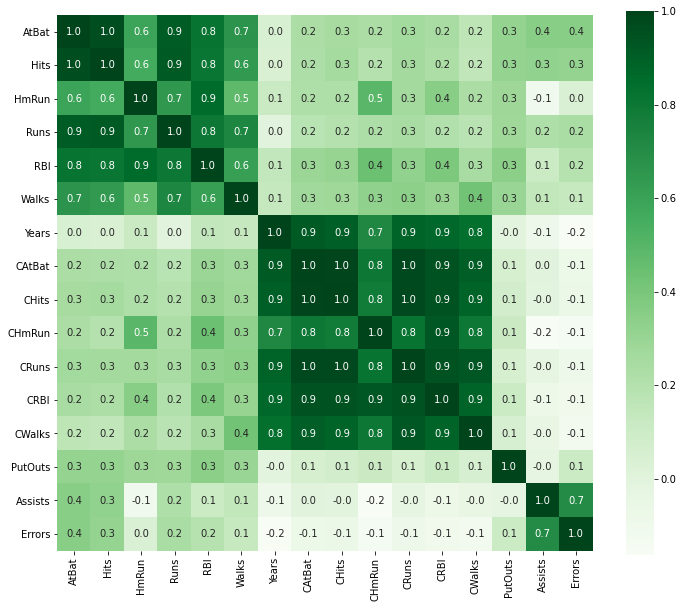

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 10}, cmap = 'Greens')

In [14]:
hitter_data['League'].value_counts()

A    175
N    147
Name: League, dtype: int64

In [15]:
hitter_data['NewLeague'].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [16]:
hitter_data['Division'].value_counts()

W    165
E    157
Name: Division, dtype: int64

In [17]:
hitter_data.replace({'League':{'A':0 , 'N': 1}},inplace = True)

hitter_data.replace({'NewLeague':{'A':0 , 'N': 1}},inplace = True)

hitter_data.replace({'Division':{'W':0 , 'E': 1}},inplace = True)

hitter_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,1,446,33,20,293,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,0,632,43,10,315,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,0,880,82,14,479,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,1,200,11,3,496,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,1,805,40,4,321,1


In [18]:
X = hitter_data.drop(columns = ['Salary'], axis = 1)
y = hitter_data.Salary

In [19]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,1,446,33,20,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,0,632,43,10,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,0,880,82,14,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,1,200,11,3,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,1,805,40,4,1


In [20]:
y.head()

0    293
1    315
2    479
3    496
4    321
Name: Salary, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [22]:
X.shape, X_train.shape, X_test.shape

((322, 19), (257, 19), (65, 19))

In [23]:
Model = LinearRegression()

In [24]:
y_train

41     216
11     202
203    243
53     591
228    359
      ... 
299    213
22      22
72     512
15     183
168    315
Name: Salary, Length: 257, dtype: object

In [25]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,1,0,103,84,5,1
11,202,53,4,31,26,27,9,1876,467,15,192,186,161,1,0,304,45,11,1
203,243,53,4,18,26,27,4,853,228,23,101,110,76,1,1,107,3,3,1
53,591,168,19,80,72,39,9,4478,1307,113,634,563,319,0,0,67,147,4,0
228,359,84,4,46,27,21,12,4992,1257,37,699,386,387,1,0,151,8,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,213,61,4,17,22,3,17,4061,1145,83,488,491,244,0,0,178,45,4,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,0,0,812,84,11,0
72,512,131,26,69,96,52,14,5347,1397,221,712,815,548,0,0,119,216,12,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,0,0,118,0,0,0


In [26]:
Model.fit(X_train,y_train)

LinearRegression()

In [27]:
Model.score(X_train,y_train)

1.0

In [28]:
train_prediction = Model.predict(X_train)

In [29]:
score_1 =  metrics.r2_score(y_train, train_prediction)
print("R squared error : ", score_1)
score_2 = metrics.mean_absolute_error(y_train, train_prediction)
print("Mean Absolute Error: ", score_2)

R squared error :  1.0
Mean Absolute Error:  3.3768750873828265e-13


In [30]:
'''input_data = (293,66,1,30,29,14,1,293,66,1,30,29,14,0,1,446,33,20,0)

input_to_array = np.asarray(input_data)

input_reshaped = input_to_array.reshape(1,-1)'''

'input_data = (293,66,1,30,29,14,1,293,66,1,30,29,14,0,1,446,33,20,0)\n\ninput_to_array = np.asarray(input_data)\n\ninput_reshaped = input_to_array.reshape(1,-1)'

In [31]:
predict_test = Model.predict(X_test)
predict_test

array([420., 312., 279., 521., 298., 172., 586., 489., 338., 578., 560.,
       288., 271., 249., 289., 191., 591., 424., 458., 209., 380., 490.,
       416., 593., 275., 239., 496., 614., 258., 313., 220., 309., 513.,
       160., 439., 330., 330., 208., 408., 278., 379., 437., 309., 574.,
       199., 288., 401., 282., 237., 265., 195., 127., 585., 278., 591.,
       475., 418., 610., 184., 520., 215., 599.,  33., 397., 199.])

In [32]:
score_1_test =  metrics.r2_score(y_test, predict_test)
print("R squared error : ", score_1_test)
score_2_test = metrics.mean_absolute_error(y_test, predict_test)
print("Mean Absolute Error: ", score_2_test)

R squared error :  1.0
Mean Absolute Error:  3.5538068214709013e-13


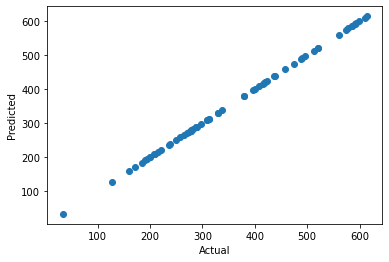

In [33]:
plt.scatter(y_test,predict_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha = 100,selection = 'random')

In [35]:
Lasso_reg.fit(X_train,y_train)

Lasso(alpha=100, selection='random')

In [36]:
#prediction on training data
Lasso_reg_predict = Lasso_reg.predict(X_train)

In [37]:
# R squared error
error_score_lasso = metrics.r2_score(y_train, Lasso_reg_predict)
error_score_lasso

0.9999669295021525

# XGBOOST

In [38]:
from xgboost import XGBRegressor

In [39]:
xgb = XGBRegressor(booster = 'gblinear', base_score = 0.1, importance_type='total_gain', random_state = 2)    

In [40]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='total_gain',
             interaction_constraints=None, learning_rate=0.5,
             max_delta_step=None, max_depth=None, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=8,
             num_parallel_tree=None, random_state=2, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [41]:
xgb_predict = xgb.predict(X_train)

In [42]:
# R squared error
error_score_xgb = metrics.r2_score(y_train, xgb_predict)
error_score_xgb

0.9905755296208123

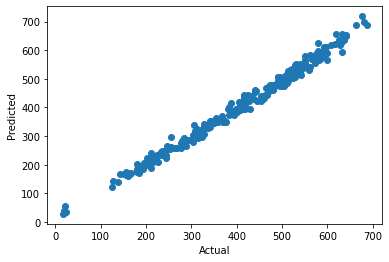

In [43]:
plt.scatter(y_train,xgb_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [44]:
xgb_predict = xgb.predict(X_test)

In [45]:
# R squared error
error_score_xgb_test = metrics.r2_score(y_test, xgb_predict)
error_score_xgb_test

0.98668376891715

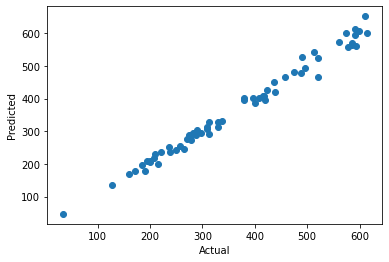

In [46]:
plt.scatter(y_test,xgb_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [50]:
from sklearn.linear_model import 

In [51]:
B_reg = BayesianRidge()

In [52]:
B_reg.fit(X_train,y_train)

BayesianRidge()

In [53]:
B_reg_predict = B_reg.predict(X_train,y_train)